Directory already exists: /DeepLearning/mnt/shixiansheng/data_fusion/output/scatter_plots_NotParrel_2011VsParrel_2011
正在处理文件: /DeepLearning/mnt/shixiansheng/data_fusion/output/2011_Data_WithoutCV/BarronScript_ALL_2011_FtAIndex_CONUS.csv, Period: Apr-Sep
x_data 长度: 137241, y_data 长度: 137241
x_data 前5个值: [nan nan nan nan nan]
y_data 前5个值: [42.62942415 42.61392312 42.57398691 42.57521526 42.50666344]
x_data 中 NaN 的数量: 81656
y_data 中 NaN 的数量: 0
RMSE: 2.0052390791586495e-15, MAE: 3.544724307390047e-16


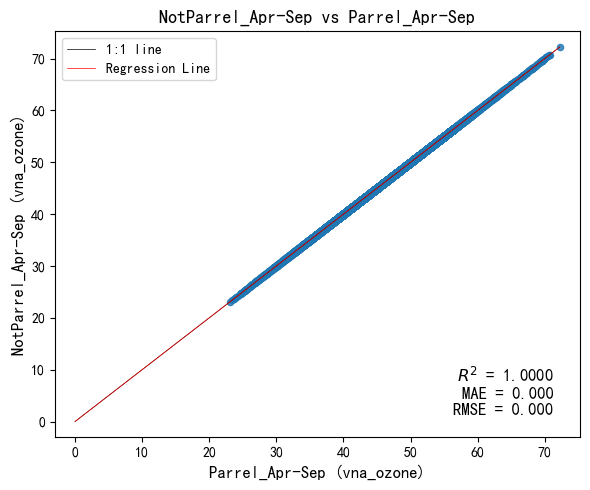

散点图已保存至 /DeepLearning/mnt/shixiansheng/data_fusion/output/scatter_plots_NotParrel_2011VsParrel_2011/BarronScript_ALL_2011_FtAIndex_CONUS_Apr-Sep_2011_vna_ozone_vs_vna_ozone_scatter.png


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import re


# -------------------- 工具函数 --------------------
def extract_key_period(period):
    """
    Extract key period (e.g., JFM, AMJ) from the full period string.
    """
    key_periods = ["DJF", "MAM", "JJA", "SON", 'Annual', 'Apr-Sep', 'top-10', '98th']
    for key in key_periods:
        if key in period:
            return key
    return None


def get_prefix(filename):
    """
    根据文件名确定前缀。
    如果文件名包含 'daily' 或 'IA'，返回 'IA'；否则返回 'AI'。
    """
    if "FtA" in filename:
        return "FtA"
    return "FtA"


def get_year(filename):
    """
    从文件名中提取年份（假设年份在 2011 - 2020 范围内）。
    """
    match = re.search(r"(20[1-2][0-9])", filename)
    if match:
        return match.group(1)
    return None


def get_axis_label(filename, period=None, year=None):
    """
    根据文件名生成轴标签。
    - 如果文件名包含 'DFT'，标签为 'DFT'。
    - 如果文件名不包含 'DFT'，标签为 'Python'。
    - 结合前缀（IA 或 AI）、Period 和年份生成最终标签。
    """
    prefix = get_prefix(filename)
    if "DFT" in filename.upper():
        label = "DFT"
    elif "BarronResult" in filename:
        label = "Barron's Result"
    elif "BarronScript" in filename:
        label = "NotParrel"
    elif "SixDataset" in filename:
        label = "Parrel"
    elif "Python" in filename:
        label = "Python"
    elif "EQUATES" in filename:
        label = "EQUATES"
    elif "Harvard" in filename:
        label = "Harvard"
    else:
        label = "unkown"

    # 添加 Period 和年份到标签中
    if period and year:
        return f"{label}_{period}"
    elif period:
        return f"{label}_{period}"
    elif year:
        return f"{label}_{year}"
    return f"{label}"


# -------------------- 数据加载 --------------------
# 第一个文件（y 轴数据）
fusion_output_files = [
    "/DeepLearning/mnt/shixiansheng/data_fusion/output/2011_Data_WithoutCV/BarronScript_ALL_2011_FtAIndex_CONUS.csv",
]

# 第二个文件（x 轴数据）
x_axis_file = "/DeepLearning/mnt/shixiansheng/data_fusion/output/2011_Data_WithoutCV/2011_SixDataset_Daily_Metrics.csv"  # 替换为实际路径

# -------------------- 创建文件夹 --------------------
base_output_dir = '/DeepLearning/mnt/shixiansheng/data_fusion/output'

# 提取年份
year_x = get_year(x_axis_file)
year_y = get_year(fusion_output_files[0])

if year_x != year_y:
    print("Warning: The years in the input files do not match!")
else:
    year = year_x

    # 生成轴标签
    x_label = get_axis_label(x_axis_file, year=year)
    y_label = get_axis_label(fusion_output_files[0], year=year)

    # 动态生成路径名称
    output_dir = os.path.join(base_output_dir, f"scatter_plots_{y_label}Vs{x_label}")

    # 如果路径不存在，则自动创建
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")
    else:
        print(f"Directory already exists: {output_dir}")


# -------------------- 定义绘图函数 --------------------
def plot_density_scatter(dataframe_x, dataframe_y, x_column, y_column, period_column, output_dir, period_value, file_name):
    """
    绘制散点图：一张为 x_column vs y_column。
    文件名包含对应的 Period 字段。
    """
    # 获取数据（通过关键字匹配 Period）
    df_period_x = dataframe_x[dataframe_x[period_column].str.contains(period_value, case=False, na=False)]
    df_period_y = dataframe_y[dataframe_y[period_column].str.contains(period_value, case=False, na=False)]

    # 如果数据为空，跳过
    if df_period_x.empty or df_period_y.empty:
        print(f"数据中没有有效数据，跳过 Period: {period_value} 的绘图。")
        return

    # 获取数据
    x_data = df_period_x[x_column].values
    y_data = df_period_y[y_column].values

    # 打印正在处理的数据信息
    print(f"正在处理文件: {file_name}, Period: {period_value}")
    print(f"x_data 长度: {len(x_data)}, y_data 长度: {len(y_data)}")
    print(f"x_data 前5个值: {x_data[:5]}")
    print(f"y_data 前5个值: {y_data[:5]}")
    print(f"x_data 中 NaN 的数量: {np.isnan(x_data).sum()}")
    print(f"y_data 中 NaN 的数量: {np.isnan(y_data).sum()}")

    # 移除 NaN 值
    valid_indices = ~np.isnan(x_data) & ~np.isnan(y_data)
    x_data = x_data[valid_indices]
    y_data = y_data[valid_indices]

    # 如果数据为空，跳过
    if len(x_data) == 0 or len(y_data) == 0:
        print(f"数据为空，跳过 Period: {period_value} 的绘图。")
        return

    # 获取文件名的基名
    file_base_name = os.path.basename(file_name).split(".")[0]

    # 提取年份
    year = get_year(file_name)

    # 只提取季节和年份部分
    period_search = extract_key_period(period_value)
    if period_search:
        period_value = period_search

    # 拼接成期望的格式，如：2011_JAS
    formatted_period = f"{period_value}_{year}"

    # 生成轴标签
    x_label = get_axis_label(x_axis_file, period_value, year)  # x 轴标签
    y_label = get_axis_label(file_name, period_value, year)    # y 轴标签

    # 绘制散点图
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.scatter(x_data, y_data, s=20, alpha=0.8)

    # 添加 1:1 参考线
    max_val = max(x_data.max(), y_data.max())

    # 调整x和y轴一样并添加余量，如果数据差别不大
    max_val1 = max_val + 3
    ax.set_xlim(-3, max_val1)
    ax.set_ylim(-3, max_val1)

    ax.plot([0, max_val], [0, max_val], 'k-', lw=0.5, label="1:1 line")

    # 添加回归线
    slope, intercept, r_value, _, _ = linregress(x_data, y_data)
    regression_line = slope * np.array([0, max_val]) + intercept
    ax.plot([0, max_val], regression_line, 'r-', lw=0.5, label="Regression Line")
    r_squared = r_value ** 2
    mae = np.mean(np.abs(y_data - x_data))  # 计算 MAE
    rmse = np.sqrt(np.mean((y_data - x_data) ** 2))  # 计算 RMSE
    print(f"RMSE: {rmse}, MAE: {mae}")
    ax.text(0.95, 0.05, f"$R^2$ = {r_squared:.4f}\nMAE = {mae:.3f}\nRMSE = {rmse:.3f}",
            transform=ax.transAxes, ha="right", va="bottom", fontsize=12)

    # 设置标题和标签
    ax.set_xlabel(f'{x_label} ({x_column})', fontsize=12)  # x 轴标签
    ax.set_ylabel(f'{y_label} ({y_column})', fontsize=12)  # y 轴标签
    ax.legend(loc='upper left', fontsize=10)

    # 将标题放置到图像顶部
    fig.subplots_adjust(top=0.85)  # 调整标题的位置
    ax.set_title(f'{y_label} vs {x_label}', fontsize=13, loc='center')

    # 保存图像，文件名包含 Period 字段和输入文件名（不含路径）
    output_file_name = f'{file_base_name}_{formatted_period}_{y_column}_vs_{x_column}_scatter.png'
    output_path = os.path.join(output_dir, output_file_name)
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()
    print(f"散点图已保存至 {output_path}")


# -------------------- 读取和处理多个文件 --------------------
def process_file(fusion_output_file):
    # 读取第一个文件的数据（y 轴数据）
    df_data_y = pd.read_csv(fusion_output_file)

    # 读取第二个文件的数据（x 轴数据）
    df_data_x = pd.read_csv(x_axis_file)

    # 提取Period列
    period_column = 'Period'  # Period列
    x_column_vna = 'vna_ozone'  # x 轴数据列
    x_column_evna = 'evna_ozone'  # x 轴数据列
    y_column_vna = 'vna_ozone'  # y 轴数据列
    y_column_evna = 'evna_ozone'  # y 轴数据列
    y_column_avna = 'evna_ozone'
    x_column_avna = 'evna_ozone'

    # 定义需要匹配的关键字（如 JFM, AMJ, JAS, OND 等）
    keywords = ['Apr-Sep']
    # keywords = ['98th']

    # 遍历每个关键字并绘制图形
    for keyword in keywords:
        # 绘制 vna_ozone vs vna_ozone
        plot_density_scatter(df_data_x, df_data_y, x_column_avna, y_column_avna, period_column, output_dir, keyword, fusion_output_file)

        # 绘制 evna_ozone vs evna_ozone

        # plot_density_scatter(df_data_x, df_data_y, x_column_avna, y_column_avna, period_column, output_dir, keyword, fusion_output_file)


# 顺序执行
for file in fusion_output_files:
    process_file(file)